# <span style="color:rgb(185, 241, 238); font-size: 48px; font-family: 'Times New Roman'; font-weight: bold; text-decoration: underline;">introduction </span>

# <span style="color:rgb(185, 241, 238); font-size: 48px; font-family: 'Times New Roman'; font-weight: bold; text-decoration: underline;">1. Importing basic libraries </span>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# <span style="color:rgb(185, 241, 238); font-size: 48px; font-family: 'Times New Roman'; font-weight: bold; text-decoration: underline;">2. Reading Files </span>

In [30]:
import pandas as pd

# Define file paths
file_paths = [
    r"C:\Users\josel\OneDrive\Documents\GitHub\House-pricing-analysis\testing_data_transformed.parquet",
    r"C:\Users\josel\OneDrive\Documents\GitHub\House-pricing-analysis\training_data_transformed.parquet",
    r"C:\Users\josel\OneDrive\Documents\GitHub\House-pricing-analysis\validating_data_transformed.parquet"
]

# Read each parquet file separately
testing_df = pd.read_parquet(file_paths[0])
training_df = pd.read_parquet(file_paths[1])
validating_df = pd.read_parquet(file_paths[2])




# <span style="color:rgb(185, 241, 238); font-size: 48px; font-family: 'Times New Roman'; font-weight: bold; text-decoration: underline;">3. Preparing dataset </span>

#### <span style="color:#7AD6C7; font-family:'Times New Roman'; font-size:32px;">**Note:**</span>

- Before training a model, the target variable (y), which is the price (koopPrijs), must be separated from the features set (X). 


## <span style="color:rgb(157, 190, 189); font-size: 36px; font-family: 'Times New Roman'; font-weight: bold; background-color: rgba(0, 251, 255, 0.19); padding: 10px; display: block; width: 100%;"> 4.1 Defining features and target
</span>


In [31]:
# Define the target column name
target_column = 'koopPrijs'  # The target variable representing property price

# Split the training data
X_train = new_train_df.drop(columns=[target_column], errors='ignore')
y_train = new_train_df[target_column] if target_column in new_train_df.columns else None

# Split the validation data
X_val = new_val_df.drop(columns=[target_column], errors='ignore')
y_val = new_val_df[target_column] if target_column in new_val_df.columns else None

# Split the testing data
X_test = new_test_df.drop(columns=[target_column], errors='ignore')
y_test = new_test_df[target_column] if target_column in new_test_df.columns else None

# Verify if target column exists in all datasets
print(f"Training target defined: {y_train is not None}")
print(f"Validation target defined: {y_val is not None}")
print(f"Testing target defined: {y_test is not None}")


Training target defined: True
Validation target defined: True
Testing target defined: True


## <span style="color:rgb(157, 190, 189); font-size: 36px; font-family: 'Times New Roman'; font-weight: bold; background-color: rgba(0, 251, 255, 0.19); padding: 10px; display: block; width: 100%;"> 4.2 Scaling the dataset
</span>


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Assuming X_train is your feature dataframe
X_train.describe().transpose()[["min", "max"]]


,min,max
bouwjaar,-1.011735e+01,7.146064e+01
indTuin,0.000000e+00,1.000000e+00
perceelOppervlakte,-8.522599e+00,2.992122e+00
aantalKamers,1.000000e+00,2.400000e+01
aantalBadkamers,-6.591949e-17,1.151856e-15
...,...,...
title_emb_380,-6.391936e-01,7.500637e-01
title_emb_381,-8.815891e-01,6.855205e-01
title_emb_382,-9.875217e-01,6.297647e-01
title_emb_383,-4.426850e-01,6.685885e-01


In [32]:
from sklearn.preprocessing import MinMaxScaler

# Initialize scaler
scaler = MinMaxScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform validation and test data using the same scaler
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)



In [23]:
import pandas as pd

# Create a dictionary to store dataset shapes
data_shapes = {
    "X_train": X_train.shape,
    "y_train": y_train.shape,
    "X_val": X_val.shape,
    "y_val": y_val.shape,
    "X_test": X_test.shape,
    "y_test": y_test.shape
}

# Convert to a DataFrame for better visualization
df_shapes = pd.DataFrame(data_shapes, index=["Rows", "Columns"]).transpose()

# Display the DataFrame
print(df_shapes)


          Rows  Columns
X_train  95837      417
y_train  95837    95837
X_val    11980      417
y_val    11980    11980
X_test   11980      417
y_test   11980    11980


### 3.2.2 fixing columns names first


In [24]:
import pandas as pd

# Assume original feature names are available from an earlier step
feature_names = [f'feature_{i}' for i in range(X_train_scaled.shape[1])]  # Placeholder if names are unknown

# Convert NumPy arrays to DataFrames with column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)
X_val_scaled = pd.DataFrame(X_val_scaled, columns=feature_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)

# Clean column names
X_train_scaled.columns = X_train_scaled.columns.astype(str).str.replace(r'[\[\]<>]', '', regex=True)
X_val_scaled.columns = X_val_scaled.columns.astype(str).str.replace(r'[\[\]<>]', '', regex=True)
X_test_scaled.columns = X_test_scaled.columns.astype(str).str.replace(r'[\[\]<>]', '', regex=True)


In the first trial, there were some issues with the titles, therefore, these will be corrected before tuning. The error "feature_names must be string, and may not contain [, ] or <" occurs because some column names in your X_train dataset contain invalid characters like brackets ([ ]) or the less-than symbol (<). XGBoost does not accept such column names. 

## <span style="color:rgb(157, 190, 189); font-size: 36px; font-family: 'Times New Roman'; font-weight: bold; background-color: rgba(0, 251, 255, 0.19); padding: 10px; display: block; width: 100%;"> 4.3 Singular Value Decomposition
</span>


### 4.3.1 Analyzing which number of components is the best

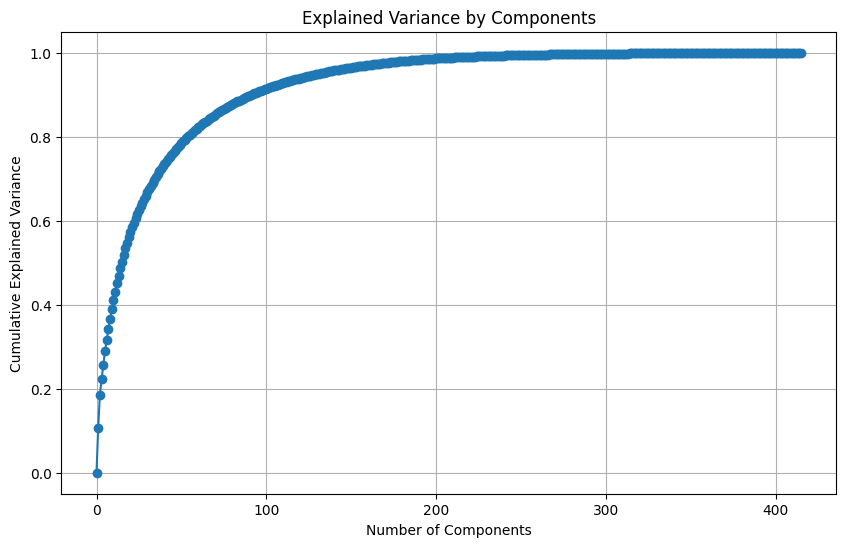

Number of components capturing 85% variance: 70


In [102]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD

# Fit SVD on the scaled training data only
svd = TruncatedSVD(n_components=min(X_train_scaled.shape[1], X_train_scaled.shape[0]) - 1, n_iter=20, random_state=42)
svd.fit(X_train_scaled)  # Fit on training data only

# Transform the datasets
X_train_transformed = svd.transform(X_train_scaled)
X_val_transformed = svd.transform(X_val_scaled)
X_test_transformed = svd.transform(X_test_scaled)

# Calculate cumulative variance explained by the components (on training data)
cumulative_variance = np.cumsum(svd.explained_variance_ratio_)

# Plot the cumulative variance
plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Components')
plt.grid(True)
plt.show()

# Determine the number of components for desired explained variance, e.g., 85%
n_components = np.where(cumulative_variance >= 0.85)[0][0] + 1
print(f"Number of components capturing 85% variance: {n_components}")



In [103]:
from sklearn.decomposition import TruncatedSVD
import numpy as np
import pandas as pd

# Convert DataFrames to NumPy arrays (ensure consistency)
X_train_np = X_train_scaled if isinstance(X_train_scaled, np.ndarray) else X_train_scaled.to_numpy()
X_val_np = X_val_scaled if isinstance(X_val_scaled, np.ndarray) else X_val_scaled.to_numpy()
X_test_np = X_test_scaled if isinstance(X_test_scaled, np.ndarray) else X_test_scaled.to_numpy()

# Combine train and validation splits for SVD fitting (avoid test set data leakage)
X_svd_fit = np.vstack([X_train_np, X_val_np])

# Fit SVD on the combined train+val set
svd_full = TruncatedSVD(n_components=min(X_svd_fit.shape) - 1, n_iter=20, random_state=42)
svd_full.fit(X_svd_fit)

# Compute cumulative explained variance
cumulative_variance = np.cumsum(svd_full.explained_variance_ratio_)

# Find the number of components that capture at least 85% variance
n_components_85 = np.argmax(cumulative_variance >= 0.85) + 1  # First index where condition is met
print(f"Number of components capturing 90% variance: {n_components_85}")

# Apply SVD with the optimal number of components
svd = TruncatedSVD(n_components=n_components_85, n_iter=20, random_state=42)
svd.fit(X_svd_fit)  # Fit only on train+val

# Transform the datasets using the trained SVD model
X_train_svd = svd.transform(X_train_np)
X_val_svd = svd.transform(X_val_np)
X_test_svd = svd.transform(X_test_np)  # Transform only, no fitting

# Convert transformed arrays back into DataFrames with meaningful column names
#column_names = [f"svd_component_{i}" for i in range(n_components_85)]
#X_train_svd = pd.DataFrame(X_train_svd, columns=column_names)
#X_val_svd = pd.DataFrame(X_val_svd, columns=column_names)
#X_test_svd = pd.DataFrame(X_test_svd, columns=column_names)

# Verify shape consistency
print(f"Train shape: {X_train_svd.shape}, Validation shape: {X_val_svd.shape}, Test shape: {X_test_svd.shape}")

# Ensure all datasets have the same number of features
assert X_train_svd.shape[1] == X_val_svd.shape[1] == X_test_svd.shape[1], "❌ Feature mismatch detected!"

print("✅ SVD applied successfully with reduced dimensions.")


Number of components capturing 90% variance: 70
Train shape: (95837, 70), Validation shape: (11980, 70), Test shape: (11980, 70)
✅ SVD applied successfully with reduced dimensions.


# <span style="color:rgb(185, 241, 238); font-size: 48px; font-family: 'Times New Roman'; font-weight: bold; text-decoration: underline;"> Random forest </span>

## <span style="color:rgb(157, 190, 189); font-size: 36px; font-family: 'Times New Roman'; font-weight: bold; background-color: rgba(0, 251, 255, 0.19); padding: 10px; display: block; width: 100%;">  Importing libraries needed for Random Forest Regressor
</span>


In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt




## <span style="color:rgb(157, 190, 189); font-size: 36px; font-family: 'Times New Roman'; font-weight: bold; background-color: rgba(0, 251, 255, 0.19); padding: 10px; display: block; width: 100%;"> Tuning the model
</span>


In [117]:
import time
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Define optimized parameter grid
param_grid = {
    "n_estimators": [50, 100],  # Reduced trees
    "max_depth": [5, 10, 15],  # Shallower trees to prevent memorization
    "min_samples_split": [5, 10, 20],  # Prevent small splits
    "min_samples_leaf": [3, 5, 10],  # Prevent overfitting on tiny leaves
    "max_features": [0.3]  # Use 30% of features per split (prevents overfitting)
}

# Initialize best parameters
best_params = None
best_error = float("inf")

# Track total iterations
total_iterations = (
    len(param_grid["n_estimators"]) *
    len(param_grid["max_depth"]) *
    len(param_grid["min_samples_split"]) *
    len(param_grid["min_samples_leaf"]) *
    len(param_grid["max_features"])
)
iteration = 1

# Grid search with cross-validation
for n_estimators in param_grid["n_estimators"]:
    for max_depth in param_grid["max_depth"]:
        for min_samples_split in param_grid["min_samples_split"]:
            for min_samples_leaf in param_grid["min_samples_leaf"]:
                for max_features in param_grid["max_features"]:
                    
                    start_time = time.time()

                    # Initialize RandomForestRegressor
                    rf = RandomForestRegressor(
                        n_estimators=n_estimators,
                        max_depth=max_depth,
                        min_samples_split=min_samples_split,
                        min_samples_leaf=min_samples_leaf,
                        max_features=max_features,
                        bootstrap=True,  # Bootstrapping helps prevent overfitting
                        random_state=42,
                        n_jobs=-1
                    )

                    # Apply 5-Fold Cross-Validation
                    mse_scores = cross_val_score(rf, X_train_scaled, y_train, scoring="neg_mean_squared_error", cv=5)
                    mse_mean = -np.mean(mse_scores)  # Convert negative MSE to positive

                    # Check if it's the best model
                    if mse_mean < best_error:
                        best_error = mse_mean
                        best_params = {
                            "n_estimators": n_estimators,
                            "max_depth": max_depth,
                            "min_samples_split": min_samples_split,
                            "min_samples_leaf": min_samples_leaf,
                            "max_features": max_features
                        }

                    elapsed_time = time.time() - start_time
                    print(f"Iteration {iteration}/{total_iterations} → "
                          f"(n_estimators={n_estimators}, max_depth={max_depth}, "
                          f"min_samples_split={min_samples_split}, min_samples_leaf={min_samples_leaf}, "
                          f"max_features={max_features}) | Mean CV MSE: {mse_mean:.4f} | Time: {elapsed_time:.2f}s")

                    iteration += 1

# Print final best parameters
print("\n✅ Best Parameters:", best_params)
print(f"✅ Lowest Mean Cross-Validation MSE: {best_error:.4f}")

# Train the best model on the full training set
rf_best = RandomForestRegressor(**best_params, random_state=42, n_jobs=-1)
rf_best.fit(X_train_scaled, y_train)

# Predict on training and validation sets
y_train_pred = rf_best.predict(X_train_scaled)
y_val_pred = rf_best.predict(X_val_scaled)

# Compute MSE and R² Scores
from sklearn.metrics import mean_squared_error, r2_score

train_mse = mean_squared_error(y_train, y_train_pred)
val_mse = mean_squared_error(y_val, y_val_pred)
train_r2 = r2_score(y_train, y_train_pred)
val_r2 = r2_score(y_val, y_val_pred)

# Print final results
print("\n📊 **Final Model Performance**")
print(f"🔹 Training Loss (MSE): {train_mse:.4f}")
print(f"🔹 Validation Loss (MSE): {val_mse:.4f}")
print(f"🔹 Training R² Score: {train_r2:.4f}")
print(f"🔹 Validation R² Score: {val_r2:.4f}")


Iteration 1/54 → (n_estimators=50, max_depth=5, min_samples_split=5, min_samples_leaf=3, max_features=0.3) | Mean CV MSE: 0.4749 | Time: 96.22s
Iteration 2/54 → (n_estimators=50, max_depth=5, min_samples_split=5, min_samples_leaf=5, max_features=0.3) | Mean CV MSE: 0.4749 | Time: 97.10s
Iteration 3/54 → (n_estimators=50, max_depth=5, min_samples_split=5, min_samples_leaf=10, max_features=0.3) | Mean CV MSE: 0.4752 | Time: 94.25s
Iteration 4/54 → (n_estimators=50, max_depth=5, min_samples_split=10, min_samples_leaf=3, max_features=0.3) | Mean CV MSE: 0.4749 | Time: 91.59s
Iteration 5/54 → (n_estimators=50, max_depth=5, min_samples_split=10, min_samples_leaf=5, max_features=0.3) | Mean CV MSE: 0.4749 | Time: 91.49s
Iteration 6/54 → (n_estimators=50, max_depth=5, min_samples_split=10, min_samples_leaf=10, max_features=0.3) | Mean CV MSE: 0.4752 | Time: 91.68s
Iteration 7/54 → (n_estimators=50, max_depth=5, min_samples_split=20, min_samples_leaf=3, max_features=0.3) | Mean CV MSE: 0.4752 |

### Saving the best params

the best parameters are saved due to time constraint, as running the gridsearch tuning took around 4 hours. Therefore, it will be saved and then used to fit the model to these best_params. 

In [118]:
import joblib

# Best hyperparameters
best_params = {
    'n_estimators': 100,
    'max_depth': 15,
    'min_samples_split': 5,
    'min_samples_leaf': 3,
    'max_features': 0.3
}

# Save path
save_path = r"C:\Users\josel\OneDrive\Documents\GitHub\randomforest_best_parameters.joblib"

# Save hyperparameters
joblib.dump(best_params, save_path)

print(f"Hyperparameters saved successfully at: {save_path}")


Hyperparameters saved successfully at: C:\Users\josel\OneDrive\Documents\GitHub\randomforest_best_parameters.joblib


In [121]:
import joblib
from sklearn.ensemble import RandomForestRegressor

# Load saved hyperparameters
load_path = r"C:\Users\josel\OneDrive\Documents\GitHub\randomforest_best_parameters.joblib"
best_hyperparameters_saved = joblib.load(load_path)


## <span style="color:rgb(157, 190, 189); font-size: 36px; font-family: 'Times New Roman'; font-weight: bold; background-color: rgba(0, 251, 255, 0.19); padding: 10px; display: block; width: 100%;"> Fitting the model on train data only
</span>


In [122]:
# Train final model using the best parameters
rf_best = RandomForestRegressor(**best_hyperparameters_saved, random_state=42, n_jobs=-1)
rf_best.fit(X_train_scaled, y_train)


RandomForestRegressor(max_depth=15, max_features=0.3, min_samples_leaf=3,
                      min_samples_split=5, n_jobs=-1, random_state=42)

Training Loss (MSE): 0.1418285341208369
Validation Loss (MSE): 0.2616445333119324
Training R² Score: 0.8582989086923704
Validation R² Score: 0.7351620159984551


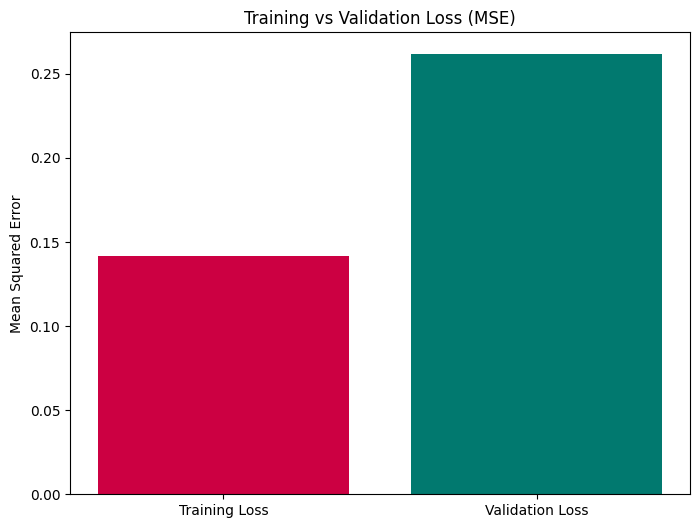

In [125]:
from sklearn.metrics import r2_score

# Calculate the predictions on the training and validation sets
y_train_pred = rf_best.predict(X_train_scaled)  # Predictions on the training set
y_val_pred = rf_best.predict(X_val_scaled)      # Predictions on the validation set

# Compute the mean squared error for training and validation sets
train_loss = mean_squared_error(y_train, y_train_pred)
val_loss = mean_squared_error(y_val, y_val_pred)

# Compute the R² scores for training and validation sets
train_r2 = r2_score(y_train, y_train_pred)
val_r2 = r2_score(y_val, y_val_pred)
# Print the MSE and R² scores
print("Training Loss (MSE):", train_loss)
print("Validation Loss (MSE):", val_loss)
print("Training R² Score:", train_r2)
print("Validation R² Score:", val_r2)
# Plot the losses
plt.figure(figsize=(8, 6))
plt.bar(["Training Loss", "Validation Loss"], [train_loss, val_loss], color=['#CC0042', '#01796F'])
plt.title("Training vs Validation Loss (MSE)")
plt.ylabel("Mean Squared Error")
plt.show()


# <span style="color:rgb(185, 241, 238); font-size: 48px; font-family: 'Times New Roman'; font-weight: bold; text-decoration: underline;">deep learning </span>

In [35]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,BatchNormalization
from tensorflow.keras.optimizers import Adam
import keras_tuner as kt
from keras_tuner import RandomSearch
from keras_tuner import HyperParameters
import random 
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

In [46]:
import keras_tuner as kt

# Define the new tuning directory
tuning_dir = r"C:\Users\josel\OneDrive\Documents\tuning_results"

# Initialize the tuner with the new path
tuner = kt.RandomSearch(
    hypermodel=MyTuner(),
    objective='val_loss',
    max_trials=25,
    overwrite=True,
    directory=tuning_dir,  # Save tuning results in OneDrive/Documents
    project_name="tune_hypermodel"
)

print(f"Tuning results will be saved in: {tuning_dir}")


UnknownError: Failed to remove a directory: \\?\C:\Users\josel\OneDrive\Documents\tuning_results\tune_hypermodel/trial_19; Input/output error

In [ ]:
# Set random seeds for reproducibility
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)
# Define the custom hypermodel class
class MyTuner(kt.HyperModel):
    def build(self, hp):
        model = Sequential()

        # Define the search space for the number of layers
        num_layers = hp.Int('num_layers', min_value=1, max_value=3)
        for i in range(num_layers):
            # Define the search space for the number of neurons in each layer
            neurons = hp.Int(f'neurons_layer_{i+1}', min_value=32, max_value=128, step=32)
            model.add(Dense(neurons, activation="relu"))
            model.add(Dropout(rate=0.2))  # Add dropout for regularization

        # Output layer for regression
        model.add(Dense(1, activation='linear'))

        # Define the search space for the learning rate
        learning_rate = hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

        # Compile the model
        model.compile(
            loss='mean_squared_error',
            optimizer=optimizer,
            metrics=['mae']  # Add MAE as a metric
        )
        return model

    def fit(self, hp, model, *args, **kwargs):
        return model.fit(
            *args,
            batch_size=hp.Choice('batch_size', [16, 32, 64]),  # Add batch_size to the search space
            **kwargs,
        )

In [45]:
# Define early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5
)

# Perform the search
tuner.search(
    X_train_scaled,
    y_train,
    epochs=20,
    validation_data=(X_val_scaled, y_val),
    callbacks=[early_stopping]
)

Trial 20 Complete [00h 00m 40s]
val_loss: 0.9881283044815063

Best val_loss So Far: 0.316414475440979
Total elapsed time: 00h 19m 38s


In [47]:
# Retrieve the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Print the best hyperparameters
print(f"Best number of layers: {best_hps.get('num_layers')}")
for i in range(best_hps.get('num_layers')):
    print(f"Best number of neurons in layer {i+1}: {best_hps.get(f'neurons_layer_{i+1}')}")
print(f"Best batch size: {best_hps.get('batch_size')}")
print(f"Best learning rate: {best_hps.get('learning_rate')}")

Best number of layers: 2
Best number of neurons in layer 1: 128
Best number of neurons in layer 2: 96
Best batch size: 32
Best learning rate: 0.0001


In [49]:
import json

# Retrieve the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Convert hyperparameters to a dictionary
best_hps_dict = {
    "num_layers": best_hps.get('num_layers'),
    "batch_size": best_hps.get('batch_size'),
    "learning_rate": best_hps.get('learning_rate'),
}

# Save the number of neurons in each layer dynamically
for i in range(best_hps.get('num_layers')):
    best_hps_dict[f"neurons_layer_{i+1}"] = best_hps.get(f'neurons_layer_{i+1}')

# Define the file path
save_path = r"C:\Users\josel\OneDrive\Documents\best_hyperparameters_ANN_model.json"

# Save to JSON file
with open(save_path, "w") as f:
    json.dump(best_hps_dict, f, indent=4)

print(f"✅ Best hyperparameters saved at: {save_path}")


✅ Best hyperparameters saved at: C:\Users\josel\OneDrive\Documents\best_hyperparameters_ANN_model.json


# <span style="color:rgb(185, 241, 238); font-size: 48px; font-family: 'Times New Roman'; font-weight: bold; text-decoration: underline;">4. XGBoost Regressor </span>

#### <span style="color:#7AD6C7; font-family:'Times New Roman'; font-size:32px;">**Reason for selecting this model:**</span>

- XGBoost was chosen as the because it can capture complex relationships in the data, as teh dataset contains numerical and categorical mix. 
- Also as the price is not purely linear, e.g. price does not increase as the postcodes increase, therefore  like location XGBoost can capture non-linear dependencies through its decision-tree-based structure.
- And for this step no scaling is needed as XGBoost is based on decision trees, which are not sensitive to feature scaling.

## <span style="color:rgb(157, 190, 189); font-size: 36px; font-family: 'Times New Roman'; font-weight: bold; background-color: rgba(0, 251, 255, 0.19); padding: 10px; display: block; width: 100%;"> 5.1 Importing libraries needed for XGBoost Regressor
</span>


In [126]:
import optuna
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import  mean_absolute_error
from sklearn.model_selection import cross_val_score
import xgboost as xgb 

#### <span style="color:#7AD6C7; font-family:'Times New Roman'; font-size:32px;">**Short Explanation of Each Library:**</span>
- **`optuna`** → This library is an automatic **hyperparameter optimization** library that helps in finding the best model settings 
- **`xgboost` (XGBRegressor)** → This is a **gradient boosting** library used for predictive modeling.
- **`sklearn.metrics.mean_squared_error`** → This function calculates the **Mean Squared Error (MSE)**, which gives the average squared difference between actual and predicted values (**lower MSE = better model performance**).



## <span style="color:rgb(157, 190, 189); font-size: 36px; font-family: 'Times New Roman'; font-weight: bold; background-color: rgba(0, 251, 255, 0.19); padding: 10px; display: block; width: 100%;"> 5.2 Performing hyperparameter tuning
</span>


#### <span style="color:#7AD6C7; font-family:'Times New Roman'; font-size:32px;">**Reason for choosing Optuna:**</span>

Optuna can efficiently searches the hyperparameter space using Bayesian optimization (TPE), which makes it much faster and smarter than traditional grid or random search. It also helps saving computation time and it optimizes critical parameters like n_estimators, max_depth, and learning_rate.

### 5.2.2 Hyperparameter tuning with Optuna

In [49]:
print(f"X_train_svd shape: {X_train_svd.shape}")
print(f"X_val_svd shape: {X_val_svd.shape}")
print(f"X_test_svd shape: {X_test_svd.shape}")  # Ensure this matches train shape


X_train_svd shape: (95837, 55)
X_val_svd shape: (11980, 55)
X_test_svd shape: (11980, 55)


#### <span style="color:#7AD6C7; font-family:'Times New Roman'; font-size:32px;">**Explanation of the output:**</span>


Based on the best hyperparameters in the next section (5.3) the XGBoost Regressor model will be trained. The best parameters are used to balance the model's complexity, prevent overfitting, and improve predictive accuracy.




## <span style="color:rgb(157, 190, 189); font-size: 36px; font-family: 'Times New Roman'; font-weight: bold; background-color: rgba(0, 251, 255, 0.19); padding: 10px; display: block; width: 100%;"> 5.3 Model fitting on the train data
</span>


The model will be first trained on the training dataset only. This allows the model to learn fundamental patterns from a smaller dataset without excessive complexity. After the model will be fitted on the combined dataset (train + validation) which can help reduce variance by providing more examples, and improve generalization without overfitting.

In [51]:
# Train the model with the best parameters on the cleaned training set
xgb = XGBRegressor(
    n_estimators=best_params["n_estimators"],
    max_depth=best_params["max_depth"],
    learning_rate=best_params["learning_rate"],
    reg_alpha=best_params["reg_alpha"],
    reg_lambda=best_params["reg_lambda"],
    random_state=42
)

# Fit the model on the cleaned training data
xgb.fit(X_train_svd, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=150, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

## <span style="color:rgb(157, 190, 189); font-size: 36px; font-family: 'Times New Roman'; font-weight: bold; background-color: rgba(0, 251, 255, 0.19); padding: 10px; display: block; width: 100%;"> 5.4 XGBoost Loss Evaluation & Visualization
</span>


In [52]:
# Calculate the predictions on the training and validation sets
y_train_pred = xgb.predict(X_train_scaled)  # Predictions on the training set
y_val_pred = xgb.predict(X_val_scaled)      # Predictions on the validation set

# Compute the mean squared error for training and validation sets
train_loss = mean_squared_error(y_train, y_train_pred)
val_loss = mean_squared_error(y_val, y_val_pred)

# Compute the R² scores for training and validation sets
train_r2 = r2_score(y_train, y_train_pred)
val_r2 = r2_score(y_val, y_val_pred)

# Print the MSE and R² scores
print("Training Loss (MSE):", train_loss)
print("Validation Loss (MSE):", val_loss)
print("Training R² Score:", train_r2)
print("Validation R² Score:", val_r2)

# Plot the losses
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.bar(["Training Loss", "Validation Loss"], [train_loss, val_loss], color=['#199E80', '#990099'])
plt.title("Training vs Validation Loss (MSE)")
plt.ylabel("Mean Squared Error")
plt.show()


ValueError: feature_names mismatch: ['svd_component_0', 'svd_component_1', 'svd_component_2', 'svd_component_3', 'svd_component_4', 'svd_component_5', 'svd_component_6', 'svd_component_7', 'svd_component_8', 'svd_component_9', 'svd_component_10', 'svd_component_11', 'svd_component_12', 'svd_component_13', 'svd_component_14', 'svd_component_15', 'svd_component_16', 'svd_component_17', 'svd_component_18', 'svd_component_19', 'svd_component_20', 'svd_component_21', 'svd_component_22', 'svd_component_23', 'svd_component_24', 'svd_component_25', 'svd_component_26', 'svd_component_27', 'svd_component_28', 'svd_component_29', 'svd_component_30', 'svd_component_31', 'svd_component_32', 'svd_component_33', 'svd_component_34', 'svd_component_35', 'svd_component_36', 'svd_component_37', 'svd_component_38', 'svd_component_39', 'svd_component_40', 'svd_component_41', 'svd_component_42', 'svd_component_43', 'svd_component_44', 'svd_component_45', 'svd_component_46', 'svd_component_47', 'svd_component_48', 'svd_component_49', 'svd_component_50', 'svd_component_51', 'svd_component_52', 'svd_component_53', 'svd_component_54'] ['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14', 'feature_15', 'feature_16', 'feature_17', 'feature_18', 'feature_19', 'feature_20', 'feature_21', 'feature_22', 'feature_23', 'feature_24', 'feature_25', 'feature_26', 'feature_27', 'feature_28', 'feature_29', 'feature_30', 'feature_31', 'feature_32', 'feature_33', 'feature_34', 'feature_35', 'feature_36', 'feature_37', 'feature_38', 'feature_39', 'feature_40', 'feature_41', 'feature_42', 'feature_43', 'feature_44', 'feature_45', 'feature_46', 'feature_47', 'feature_48', 'feature_49', 'feature_50', 'feature_51', 'feature_52', 'feature_53', 'feature_54', 'feature_55', 'feature_56', 'feature_57', 'feature_58', 'feature_59', 'feature_60', 'feature_61', 'feature_62', 'feature_63', 'feature_64', 'feature_65', 'feature_66', 'feature_67', 'feature_68', 'feature_69', 'feature_70', 'feature_71', 'feature_72', 'feature_73', 'feature_74', 'feature_75', 'feature_76', 'feature_77', 'feature_78', 'feature_79', 'feature_80', 'feature_81', 'feature_82', 'feature_83', 'feature_84', 'feature_85', 'feature_86', 'feature_87', 'feature_88', 'feature_89', 'feature_90', 'feature_91', 'feature_92', 'feature_93', 'feature_94', 'feature_95', 'feature_96', 'feature_97', 'feature_98', 'feature_99', 'feature_100', 'feature_101', 'feature_102', 'feature_103', 'feature_104', 'feature_105', 'feature_106', 'feature_107', 'feature_108', 'feature_109', 'feature_110', 'feature_111', 'feature_112', 'feature_113', 'feature_114', 'feature_115', 'feature_116', 'feature_117', 'feature_118', 'feature_119', 'feature_120', 'feature_121', 'feature_122', 'feature_123', 'feature_124', 'feature_125', 'feature_126', 'feature_127', 'feature_128', 'feature_129', 'feature_130', 'feature_131', 'feature_132', 'feature_133', 'feature_134', 'feature_135', 'feature_136', 'feature_137', 'feature_138', 'feature_139', 'feature_140', 'feature_141', 'feature_142', 'feature_143', 'feature_144', 'feature_145', 'feature_146', 'feature_147', 'feature_148', 'feature_149', 'feature_150', 'feature_151', 'feature_152', 'feature_153', 'feature_154', 'feature_155', 'feature_156', 'feature_157', 'feature_158', 'feature_159', 'feature_160', 'feature_161', 'feature_162', 'feature_163', 'feature_164', 'feature_165', 'feature_166', 'feature_167', 'feature_168', 'feature_169', 'feature_170', 'feature_171', 'feature_172', 'feature_173', 'feature_174', 'feature_175', 'feature_176', 'feature_177', 'feature_178', 'feature_179', 'feature_180', 'feature_181', 'feature_182', 'feature_183', 'feature_184', 'feature_185', 'feature_186', 'feature_187', 'feature_188', 'feature_189', 'feature_190', 'feature_191', 'feature_192', 'feature_193', 'feature_194', 'feature_195', 'feature_196', 'feature_197', 'feature_198', 'feature_199', 'feature_200', 'feature_201', 'feature_202', 'feature_203', 'feature_204', 'feature_205', 'feature_206', 'feature_207', 'feature_208', 'feature_209', 'feature_210', 'feature_211', 'feature_212', 'feature_213', 'feature_214', 'feature_215', 'feature_216', 'feature_217', 'feature_218', 'feature_219', 'feature_220', 'feature_221', 'feature_222', 'feature_223', 'feature_224', 'feature_225', 'feature_226', 'feature_227', 'feature_228', 'feature_229', 'feature_230', 'feature_231', 'feature_232', 'feature_233', 'feature_234', 'feature_235', 'feature_236', 'feature_237', 'feature_238', 'feature_239', 'feature_240', 'feature_241', 'feature_242', 'feature_243', 'feature_244', 'feature_245', 'feature_246', 'feature_247', 'feature_248', 'feature_249', 'feature_250', 'feature_251', 'feature_252', 'feature_253', 'feature_254', 'feature_255', 'feature_256', 'feature_257', 'feature_258', 'feature_259', 'feature_260', 'feature_261', 'feature_262', 'feature_263', 'feature_264', 'feature_265', 'feature_266', 'feature_267', 'feature_268', 'feature_269', 'feature_270', 'feature_271', 'feature_272', 'feature_273', 'feature_274', 'feature_275', 'feature_276', 'feature_277', 'feature_278', 'feature_279', 'feature_280', 'feature_281', 'feature_282', 'feature_283', 'feature_284', 'feature_285', 'feature_286', 'feature_287', 'feature_288', 'feature_289', 'feature_290', 'feature_291', 'feature_292', 'feature_293', 'feature_294', 'feature_295', 'feature_296', 'feature_297', 'feature_298', 'feature_299', 'feature_300', 'feature_301', 'feature_302', 'feature_303', 'feature_304', 'feature_305', 'feature_306', 'feature_307', 'feature_308', 'feature_309', 'feature_310', 'feature_311', 'feature_312', 'feature_313', 'feature_314', 'feature_315', 'feature_316', 'feature_317', 'feature_318', 'feature_319', 'feature_320', 'feature_321', 'feature_322', 'feature_323', 'feature_324', 'feature_325', 'feature_326', 'feature_327', 'feature_328', 'feature_329', 'feature_330', 'feature_331', 'feature_332', 'feature_333', 'feature_334', 'feature_335', 'feature_336', 'feature_337', 'feature_338', 'feature_339', 'feature_340', 'feature_341', 'feature_342', 'feature_343', 'feature_344', 'feature_345', 'feature_346', 'feature_347', 'feature_348', 'feature_349', 'feature_350', 'feature_351', 'feature_352', 'feature_353', 'feature_354', 'feature_355', 'feature_356', 'feature_357', 'feature_358', 'feature_359', 'feature_360', 'feature_361', 'feature_362', 'feature_363', 'feature_364', 'feature_365', 'feature_366', 'feature_367', 'feature_368', 'feature_369', 'feature_370', 'feature_371', 'feature_372', 'feature_373', 'feature_374', 'feature_375', 'feature_376', 'feature_377', 'feature_378', 'feature_379', 'feature_380', 'feature_381', 'feature_382', 'feature_383', 'feature_384', 'feature_385', 'feature_386', 'feature_387', 'feature_388', 'feature_389', 'feature_390', 'feature_391', 'feature_392', 'feature_393', 'feature_394', 'feature_395', 'feature_396', 'feature_397', 'feature_398', 'feature_399', 'feature_400', 'feature_401', 'feature_402', 'feature_403', 'feature_404', 'feature_405', 'feature_406', 'feature_407', 'feature_408', 'feature_409', 'feature_410', 'feature_411', 'feature_412', 'feature_413', 'feature_414', 'feature_415', 'feature_416']
expected svd_component_28, svd_component_38, svd_component_0, svd_component_29, svd_component_16, svd_component_37, svd_component_10, svd_component_17, svd_component_32, svd_component_4, svd_component_7, svd_component_22, svd_component_52, svd_component_53, svd_component_45, svd_component_49, svd_component_9, svd_component_20, svd_component_18, svd_component_21, svd_component_1, svd_component_30, svd_component_36, svd_component_44, svd_component_8, svd_component_43, svd_component_48, svd_component_2, svd_component_46, svd_component_27, svd_component_25, svd_component_41, svd_component_51, svd_component_13, svd_component_15, svd_component_34, svd_component_12, svd_component_11, svd_component_5, svd_component_39, svd_component_23, svd_component_50, svd_component_31, svd_component_33, svd_component_42, svd_component_19, svd_component_24, svd_component_6, svd_component_26, svd_component_3, svd_component_40, svd_component_35, svd_component_47, svd_component_54, svd_component_14 in input data
training data did not have the following fields: feature_323, feature_213, feature_313, feature_84, feature_159, feature_296, feature_269, feature_124, feature_219, feature_253, feature_370, feature_25, feature_345, feature_288, feature_247, feature_264, feature_227, feature_74, feature_152, feature_153, feature_399, feature_396, feature_55, feature_11, feature_63, feature_118, feature_121, feature_337, feature_346, feature_128, feature_341, feature_318, feature_252, feature_45, feature_173, feature_324, feature_304, feature_76, feature_218, feature_71, feature_246, feature_4, feature_258, feature_381, feature_354, feature_209, feature_127, feature_32, feature_64, feature_273, feature_325, feature_29, feature_114, feature_83, feature_237, feature_210, feature_172, feature_305, feature_139, feature_170, feature_51, feature_200, feature_239, feature_33, feature_350, feature_162, feature_271, feature_368, feature_30, feature_161, feature_366, feature_261, feature_203, feature_93, feature_197, feature_116, feature_329, feature_208, feature_94, feature_223, feature_22, feature_256, feature_263, feature_349, feature_300, feature_151, feature_37, feature_62, feature_8, feature_190, feature_398, feature_75, feature_326, feature_411, feature_274, feature_101, feature_112, feature_125, feature_53, feature_319, feature_240, feature_12, feature_320, feature_228, feature_302, feature_291, feature_201, feature_28, feature_408, feature_180, feature_332, feature_359, feature_265, feature_126, feature_154, feature_298, feature_181, feature_205, feature_266, feature_338, feature_174, feature_187, feature_334, feature_293, feature_100, feature_365, feature_322, feature_56, feature_221, feature_61, feature_31, feature_86, feature_177, feature_317, feature_73, feature_20, feature_57, feature_66, feature_157, feature_405, feature_18, feature_376, feature_194, feature_160, feature_393, feature_198, feature_135, feature_272, feature_403, feature_281, feature_40, feature_140, feature_36, feature_235, feature_397, feature_284, feature_407, feature_311, feature_89, feature_189, feature_69, feature_13, feature_308, feature_14, feature_238, feature_342, feature_216, feature_392, feature_382, feature_280, feature_150, feature_395, feature_212, feature_257, feature_268, feature_199, feature_110, feature_80, feature_122, feature_16, feature_225, feature_48, feature_275, feature_97, feature_92, feature_307, feature_109, feature_390, feature_282, feature_414, feature_413, feature_59, feature_134, feature_117, feature_141, feature_283, feature_339, feature_144, feature_142, feature_26, feature_90, feature_412, feature_15, feature_34, feature_377, feature_168, feature_111, feature_347, feature_17, feature_277, feature_23, feature_87, feature_65, feature_204, feature_217, feature_363, feature_107, feature_351, feature_292, feature_179, feature_35, feature_167, feature_254, feature_165, feature_402, feature_386, feature_46, feature_374, feature_10, feature_276, feature_2, feature_232, feature_44, feature_289, feature_314, feature_19, feature_409, feature_60, feature_262, feature_164, feature_312, feature_348, feature_81, feature_147, feature_380, feature_132, feature_158, feature_400, feature_136, feature_286, feature_371, feature_120, feature_387, feature_388, feature_214, feature_191, feature_248, feature_297, feature_143, feature_104, feature_108, feature_295, feature_119, feature_242, feature_259, feature_123, feature_379, feature_367, feature_310, feature_360, feature_95, feature_38, feature_352, feature_115, feature_0, feature_356, feature_416, feature_186, feature_146, feature_70, feature_234, feature_270, feature_373, feature_6, feature_96, feature_358, feature_385, feature_415, feature_21, feature_401, feature_251, feature_243, feature_355, feature_378, feature_333, feature_155, feature_5, feature_27, feature_163, feature_340, feature_343, feature_156, feature_353, feature_77, feature_362, feature_285, feature_328, feature_249, feature_287, feature_72, feature_138, feature_394, feature_52, feature_224, feature_130, feature_137, feature_383, feature_195, feature_58, feature_88, feature_202, feature_131, feature_149, feature_361, feature_233, feature_129, feature_226, feature_1, feature_327, feature_330, feature_133, feature_43, feature_306, feature_178, feature_49, feature_294, feature_255, feature_344, feature_184, feature_391, feature_290, feature_99, feature_315, feature_244, feature_303, feature_211, feature_102, feature_175, feature_91, feature_105, feature_192, feature_78, feature_166, feature_267, feature_188, feature_103, feature_47, feature_321, feature_50, feature_67, feature_82, feature_85, feature_3, feature_39, feature_196, feature_250, feature_357, feature_207, feature_241, feature_145, feature_148, feature_113, feature_41, feature_220, feature_372, feature_183, feature_389, feature_231, feature_79, feature_404, feature_222, feature_364, feature_229, feature_42, feature_215, feature_193, feature_24, feature_236, feature_206, feature_185, feature_171, feature_301, feature_375, feature_309, feature_9, feature_299, feature_384, feature_410, feature_98, feature_369, feature_169, feature_335, feature_7, feature_278, feature_316, feature_245, feature_176, feature_406, feature_54, feature_106, feature_230, feature_260, feature_68, feature_279, feature_182, feature_331, feature_336

In [ ]:
# Train the XGBoost model with the best hyperparameters from Optuna
xgb_best_model = XGBRegressor(**best_params)  # Use best_params from Optuna
xgb_best_model.fit(X_train_scaled, y_train)  # Train on scaled data

# Function to evaluate XGBoost model
def evaluate_xgb(model, X, y, dataset_name="Dataset"):
    """Evaluate the trained XGBoost model and print performance metrics."""
    from sklearn.metrics import mean_squared_error, r2_score
    
    # Predict on the given dataset
    y_pred = model.predict(X)
    
    # Compute evaluation metrics
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    
    # Print the results
    print(f"=== Evaluation on {dataset_name} ===")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"R² Score: {r2:.4f}")
    print("=" * 40)

# Evaluate the trained XGBoost model
evaluate_xgb(xgb_best_model, X_train_scaled, y_train, dataset_name="Training Set")
evaluate_xgb(xgb_best_model, X_val_scaled, y_val, dataset_name="Validation Set")



=== Evaluation on Training Set ===
Mean Squared Error (MSE): 1066998522.1377
R² Score: 0.9205
=== Evaluation on Validation Set ===
Mean Squared Error (MSE): 3219165209.2728
R² Score: 0.7598


In [ ]:
rmse_train = train_loss ** 0.5
rmse_val = val_loss ** 0.5
print(f"Training RMSE: {rmse_train}")
print(f"Validation RMSE: {rmse_val}")


Training RMSE: 32406.48607764113
Validation RMSE: 56946.12337104199


## <span style="color:rgb(157, 190, 189); font-size: 36px; font-family: 'Times New Roman'; font-weight: bold; background-color: rgba(0, 251, 255, 0.19); padding: 10px; display: block; width: 100%;"> 5.3 Model fitting on the train and validation data 
</span>


In this section the model will be fitted on the X_train_val and y_train_val, which is teh merged dataset of the train and validation data together. As the model was first trained on the training dataset to learn patterns. And now with the combined dataset the can learn from a larger  dataset, which can help the model in making better predictions or generalization while also reducing the risk of overfitting to the original training set. Also, by retraining the model, the model can benefit from additional insights present in the validation set, which can help the model to perform better.

### 5.3.1 Combining train and validation dataset

In [ ]:
# Combine training and validation datasets
X_train_val = np.vstack([X_train, X_val])
y_train_val = np.hstack([y_train, y_val])

# Print the shapes to verify
print(f"X_train_val shape: {X_train_val.shape}")
print(f"y_train_val shape: {y_train_val.shape}")

X_train_val shape: (159730, 417)
y_train_val shape: (159730,)


### 5.3.2 Fitting the model

In [ ]:
# Retrain the final model using the optimized hyperparameters on the full training dataset (train + validation)
merged_data_xgb = XGBRegressor(
    n_estimators=best_params["n_estimators"],
    max_depth=best_params["max_depth"],
    learning_rate=best_params["learning_rate"],
    reg_alpha=best_params["reg_alpha"],
    reg_lambda=best_params["reg_lambda"],
    random_state=42
)

merged_data_xgb.fit(X_train_val,y_train_val)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.07553265099874637,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=13, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=150, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

## <span style="color:rgb(157, 190, 189); font-size: 36px; font-family: 'Times New Roman'; font-weight: bold; background-color: rgba(0, 251, 255, 0.19); padding: 10px; display: block; width: 100%;"> 5.4 XGBoost Loss Evaluation & Visualization on the merged_data_xgb
</span>


Training + Validation MSE: 336117862.92952955
Test MSE: 3105672273.9188557
Training + Validation MAE: 12165.695407743731
Test MAE: 39154.773123106206
Training + Validation R² Score: 0.9749577899018921
Test R² Score: 0.7703999800283146


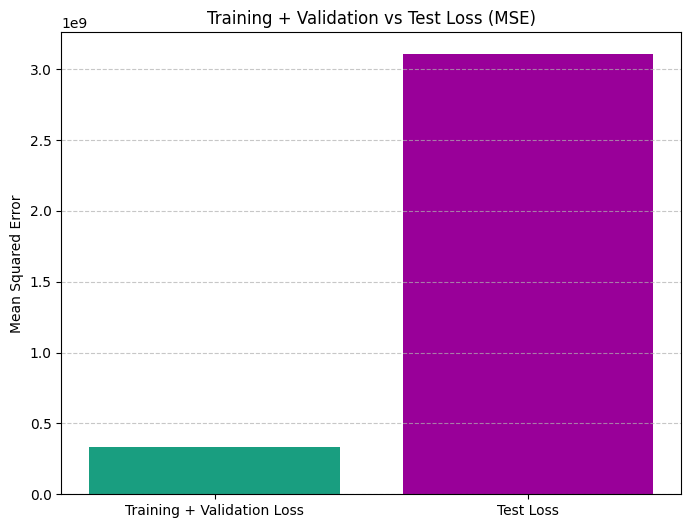

In [ ]:

# Fit the model on the merged training and validation set
merged_data_xgb.fit(X_train_val, y_train_val)  

# Generate predictions for the merged training-validation set and test set
y_train_val_pred = merged_data_xgb.predict(X_train_val)  
y_test_pred = merged_data_xgb.predict(X_test)           

# Compute the Mean Squared Error (MSE) for both datasets
train_val_mse = mean_squared_error(y_train_val, y_train_val_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# Compute the Mean Absolute Error (MAE) for both datasets
train_val_mae = mean_absolute_error(y_train_val, y_train_val_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

# Compute the R² scores for both datasets
train_val_r2 = r2_score(y_train_val, y_train_val_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print the evaluation metrics
print("Training + Validation MSE:", train_val_mse)
print("Test MSE:", test_mse)
print("Training + Validation MAE:", train_val_mae)
print("Test MAE:", test_mae)
print("Training + Validation R² Score:", train_val_r2)
print("Test R² Score:", test_r2)

# Plot only the MSE for Training + Validation vs Test Set
plt.figure(figsize=(8, 6))
plt.bar(["Training + Validation Loss", "Test Loss"], [train_val_mse, test_mse], color=['#199E80', '#990099'])
plt.title("Training + Validation vs Test Loss (MSE)")
plt.ylabel("Mean Squared Error")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Store the test performance metrics for further use
test_mse_xgb = test_mse
test_mae_xgb = test_mae
test_r2_xgb = test_r2


## <span style="color:rgb(157, 190, 189); font-size: 36px; font-family: 'Times New Roman'; font-weight: bold; background-color: rgba(0, 251, 255, 0.19); padding: 10px; display: block; width: 100%;"> 5.5 Conclusion
</span>


#### <span style="color:#7AD6C7; font-family:'Times New Roman'; font-size:32px;">**Analysis and Evaluation of Model Performance**</span>

The evaluation metrics provide key insights into the model’s **performance and generalization ability** across different datasets (Training, Validation, and Test). Below is a detailed breakdown:

---

#### <span style="color:#7AD6C7; font-family:'Times New Roman'; font-size:28px;">**1️⃣ Training vs. Validation Performance**</span>

- **Training Loss (MSE):** **2.25B** vs. **Validation Loss (MSE):** **9.54B**  
- **Training R² Score:** **0.944** vs. **Validation R² Score:** **0.768**  

The model performs **very well on training data**, explaining **94.4% of variance**, but struggles with validation (**MSE is much higher, R² drops to 0.768**). This suggests **overfitting**, where the model memorizes training data rather than generalizing.

---

#### <span style="color:#7AD6C7; font-family:'Times New Roman'; font-size:28px;">**2️⃣ Combined Training + Validation vs. Test Performance**</span>

- **Training + Validation MSE:** **2.67B** vs. **Test MSE:** **10.52B**  
- **Training + Validation R² Score:** **0.934** vs. **Test R² Score:** **0.758**  
- **Training + Validation MAE:** **36,327** vs. **Test MAE:** **52,184**  

After merging training and validation, **MSE remains relatively low (2.67B), and R² is strong (0.934)**. However, the **test set still shows high error (10.52B MSE, 0.758 R²)**, meaning the model struggles to generalize beyond seen data.

---

#### <span style="color:#7AD6C7; font-family:'Times New Roman'; font-size:28px;">**3️⃣ Key Takeaways & Next Steps**</span>

✅ **Overfitting is present** – The model performs much better on training than test data.  
✅ **Prediction error is high** – MAE on the test set is **~52K**, meaning predictions deviate significantly.  
✅ **Regularization & feature selection needed** – Adjusting `reg_alpha`, `reg_lambda`, or reducing `max_depth` may help.  
✅ **Generalization can improve** – Trying ensembling or reducing feature complexity could enhance test performance.  

---

#### <span style="color:#7AD6C7; font-family:'Times New Roman'; font-size:28px;">**🔎 Conclusion**</span>

The model **learns well on training data but struggles to generalize**. Refining regularization, reducing complexity, and tuning hyperparameters can help **improve test performance and reduce overfitting**. 🚀


# <span style="color:rgb(185, 241, 238); font-size: 48px; font-family: 'Times New Roman'; font-weight: bold; text-decoration: underline;">5. Random Forest Regressor </span>

 Random Forest for Regression
Model: RandomForestRegressor (from sklearn.ensemble)
Purpose: Predicts continuous values (e.g., house prices, stock market trends).
Example Use Case: Estimating real estate prices based on features like square footage, location, etc.